# KNN Implementation code

In [3]:
import numpy as np
from collections import Counter

from sklearn import datasets
from sklearn.model_selection import train_test_split

In [4]:
# Define the euclidean distance used to compute the distance between two data instances.

def euclidean_distance(x1, x2):
    distance = np.sqrt(np.sum((x1-x2)**2))
    return distance

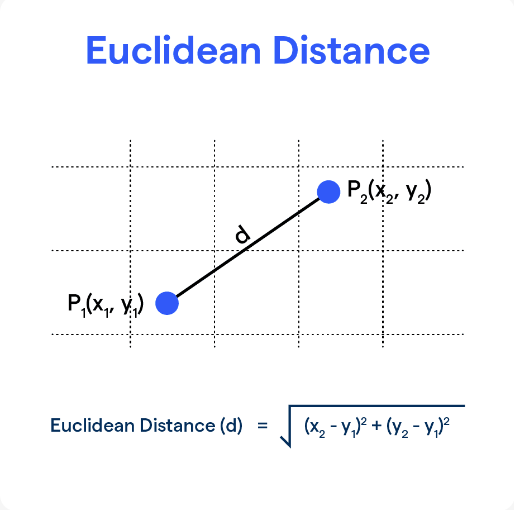

In [5]:
# Implement KNN algorithm

class KNN:
    def __init__(self, k=3):
        self.k = k
        # k is the number of nearest neighbours to concider.

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions
        # X would be an array of data instances.
        # x would be an instance containing 4 features

    def _predict(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        most_common = Counter(k_nearest_labels).most_common()

        return most_common[0][0]

### The Iris Dataset

This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray

The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.



In [7]:
# read iris dataset from scikit-learn
iris = datasets.load_iris()

X, y = iris.data, iris.target
# X : data samples each containing 4 features
# y : dependent/target variable containing 3 classes 0, 1, 2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [8]:
# Clreate a classifier and predict the targt value for the test samples

classifier = KNN(k=5)

classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)
predictions = np.array(predictions)   # convert to numpy array
predictions  # Predicted target values for the X_test samples

array([1, 2, 2, 0, 1, 0, 0, 0, 1, 2, 1, 0, 2, 1, 0, 1, 2, 0, 2, 1, 1, 1,
       1, 1, 2, 0, 2, 1, 2, 0])

In [9]:
y_test  # actual target values for the X_test samples

array([1, 1, 2, 0, 1, 0, 0, 0, 1, 2, 1, 0, 2, 1, 0, 1, 2, 0, 2, 1, 1, 1,
       1, 1, 2, 0, 2, 1, 2, 0])

In [10]:
# Evaluate the performance. 
# Compute the accuracy of the model

# Number of false Predictions
false_predict = np.sum(predictions != y_test)
print(f'number of false predictions: {false_predict}')

# Number of true predictions
true_predict = np.sum(predictions == y_test)
print(f'number of false predictions: {true_predict}')

# Accuracy: Number of true predictions over all
accuracy = true_predict / len(y_test)
print(f'Accuracy: {accuracy}')

number of false predictions: 1
number of false predictions: 29
Accuracy: 0.9666666666666667
